Try to understand how much the width of the volume considered is affecting a SPH map

In [1]:
import pynbody
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
def bounding_box(snap):
    unit = snap['pos'].units
    for coord in 'x y z'.split():
        print("{}: {:10.2f}, {:10.2f} ({})".format(coord, snap[coord].min(), snap[coord].max(), unit))
    return [(float(snap[coord].min()), float(snap[coord].max())) for coord in 'x y z'.split()]

In [3]:
snap = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap)

In [4]:
max_boxsize = 4000

In [5]:
s.properties['boxsize'] = pynbody.units.Unit("{} kpc".format(max_boxsize))

In [6]:
width = 8
resolution=500

In [7]:
def v_img(r, width=width):
    subsnap = s[pynbody.filt.Sphere('{} kpc'.format(r))]
    pynbody.analysis.angmom.sideon(subsnap.s)
    return pynbody.plot.sph.image(subsnap.stars, qty='vz', av_z=True, width=width, resolution=resolution, log=False, noplot=True)

radius = np.arange(width*1.5, 120, 5)  # 1.5 to avoid border effect
import tqdm
img = list()
for r in tqdm.tqdm(radius):
    img.append(v_img(r))

100%|██████████| 28/28 [00:38<00:00,  1.38s/it]


Experiment with `multiprocessing.Pool`. It is slight faster (because I already use multiple threads when producing the image), but it produces slight different results. And I don't like it.

In [8]:
# from multiprocessing import Pool
# with Pool(8) as p:
#     img = p.map(v_img, radius)

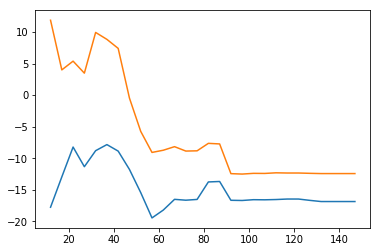

In [9]:
v_min = np.array([i.min() for i in img])
v_max = np.array([i.max() for i in img])

plt.plot(radius, v_min)
plt.plot(radius, v_max)

In [10]:
bounding_box(s)

x:  -17620.47,   14766.10 (kpc)
y:  -11749.05,   14671.65 (kpc)
z:  -14933.63,   19652.76 (kpc)


[(-17620.470703125, 14766.1044921875),
 (-11749.0537109375, 14671.6533203125),
 (-14933.62890625, 19652.763671875)]

In [11]:
pynbody.analysis.halo.center(s.s)#, vel=False)
# pynbody.analysis.angmom.sideon(s.s)

In [12]:
bounding_box(s)

x:  -17620.47,   14766.11 (kpc)
y:  -11749.06,   14671.65 (kpc)
z:  -14933.63,   19652.76 (kpc)


[(-17620.46875, 14766.1064453125),
 (-11749.0595703125, 14671.6474609375),
 (-14933.6318359375, 19652.76171875)]

This is bad

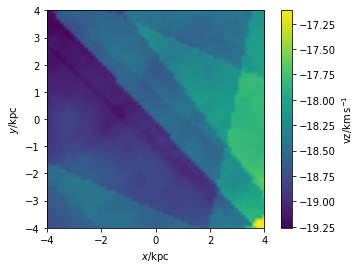

In [13]:
v_los_sim = pynbody.plot.sph.image(s.s, qty='vz', av_z=True, width=width, resolution=resolution, log=False)

In [14]:
pynbody.analysis.angmom.sideon(s.s)

In [15]:
half_light_radius = pynbody.analysis.luminosity.half_light_r(s, cylindrical=True)
half_light_radius

SimArray(0.90299149, 'kpc')

I leave free the scale, so that you can see that if you change the radius, the extent of the velocity changes a lot. Try to move r from 40 to 45.

In [16]:
max_r = 100 * half_light_radius
radius_slider = ipywidgets.IntSlider(min=0, max=max_r, value=5, step=5)
width_slider = ipywidgets.IntSlider(min=0, max=max_r, value=width)
def k(r, w):
    subsnap = s[pynbody.filt.Sphere('{} kpc'.format(r))]
    pynbody.analysis.angmom.sideon(subsnap.s)
    pynbody.plot.sph.image(subsnap.stars,
                           qty='vz', av_z=True, width=w, resolution=resolution, log=False)#, vmin=-v, vmax=v)
w = ipywidgets.interactive(k, r=radius_slider, w=width_slider)
w

interactive(children=(IntSlider(value=5, description='r', max=90, step=5), IntSlider(value=8, description='w',…

In [17]:
max_r = 100 * half_light_radius
radius_slider = ipywidgets.IntSlider(min=1, max=max_r, value=5)
width_slider = ipywidgets.IntSlider(min=0, max=max_r, value=width)
vel_slider = ipywidgets.IntSlider(min=0, max=100, value=10, step =5)
def k(r, w, v):
    subsnap = s[pynbody.filt.Sphere('{} kpc'.format(r))]
    pynbody.analysis.angmom.sideon(subsnap.s)
    pynbody.plot.sph.image(subsnap.stars,
                           qty='vz', av_z=True, width=w, resolution=resolution, log=False, vmin=-v, vmax=v)
w = ipywidgets.interactive(k, r=radius_slider, w=width_slider, v=vel_slider)
w

interactive(children=(IntSlider(value=5, description='r', max=90, min=1), IntSlider(value=8, description='w', …